In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["label", "message"]
df['label_num']=df['label'].map({
    'ham':0,
    'spam':1
})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)
df['preprocessed_txt'] = df['message'].apply(preprocess)
df.head()

,label,message,label_num,preprocessed_txt
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf live


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_txt'])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(tfidf_matrix.toarray())

kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(pca_matrix)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
pca_matrix

array([[-0.0164243 , -0.01594594],
       [ 0.26452837,  0.00982917],
       [-0.02634951, -0.01900223],
       ...,
       [-0.01304087, -0.00877271],
       [-0.0251177 , -0.01947612],
       [-0.01626654, -0.01015541]])

In [ ]:
len(pca_matrix)

5572

In [ ]:
df['cluster']=kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score
cluster_labels=kmeans.labels_

In [ ]:
silhouette_avg = silhouette_score(pca_matrix, cluster_labels)

In [ ]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8818076295409091


In [ ]:
df

,label,message,label_num,preprocessed_txt,cluster
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...,0
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win FA Cup final tkts 2...,0
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf live,0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time try 2 contact u. U win å£750 Pound pr...,0
5568,ham,Will Ì_ b going to esplanade fr home?,0,Ì b go esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,pity mood suggestion,0
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitching act like interested buy week give...,0


<ipython-input-14-674336b9efbc>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_matrix[ham_indices, 0], pca_matrix[ham_indices, 1], label='Ham', cmap='viridis', s=5)
<ipython-input-14-674336b9efbc>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_matrix[spam_indices, 0], pca_matrix[spam_indices, 1], label='Spam', cmap='viridis', s=5)


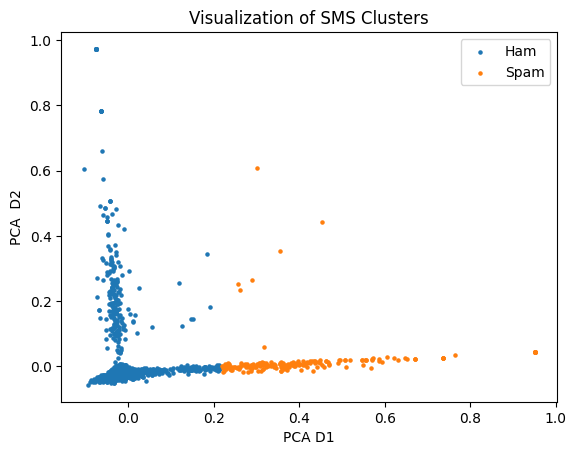

In [ ]:
ham_indices = df[df['cluster'] == 0].index
spam_indices = df[df['cluster'] == 1].index


plt.scatter(pca_matrix[ham_indices, 0], pca_matrix[ham_indices, 1], label='Ham', cmap='viridis', s=5)
plt.scatter(pca_matrix[spam_indices, 0], pca_matrix[spam_indices, 1], label='Spam', cmap='viridis', s=5)

plt.title('Visualization of SMS Clusters')
plt.legend()
plt.xlabel('PCA D1')
plt.ylabel('PCA  D2')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

accuracy=accuracy_score(df['label_num'],df['cluster'])
report=classification_report(df['label_num'], df['cluster'])

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}')



Accuracy: 0.8304020100502513
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4825
           1       0.00      0.00      0.00       747

    accuracy                           0.83      5572
   macro avg       0.43      0.48      0.45      5572
weighted avg       0.75      0.83      0.79      5572

